<a href="https://colab.research.google.com/github/Richajaishwal0/meroNotes/blob/main/MLL1exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
df=pd.read_csv('/content/Taxi_Trips.csv')

In [ ]:
df.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,0287f53fedcde6b0af9aab9e32cbd2cadb337eaa,e54db25f18193a08f1f5754515e8c338480e04fb938ed3...,03/01/2024 12:00:00 AM,03/01/2024 12:00:00 AM,15.0,0.09,NaN,NaN,8.0,8.0,...,35.0,38.75,Credit Card,City Service,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
1,1f0034299b914fd7b45002568576a353c83acb2f,4a263f78f56815be4acd38658af8fc1824ce4e15f7ec81...,03/01/2024 12:00:00 AM,03/01/2024 12:15:00 AM,900.0,3.00,NaN,NaN,24.0,8.0,...,0.0,12.00,Cash,Taxi Affiliation Services,41.901207,-87.676356,POINT (-87.6763559892 41.9012069941),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
2,01a0b77b722a0b91f45cb4fc90b3e64f76fd0681,4f1e94982e6851725add382f7981d64006ae7c38f3664f...,03/01/2024 12:00:00 AM,03/01/2024 12:00:00 AM,711.0,5.84,NaN,NaN,56.0,NaN,...,5.0,26.70,Credit Card,City Service,41.792592,-87.769615,POINT (-87.7696154528 41.7925923603),NaN,NaN,NaN
3,14aff2071ac81c6450a8f8b0e1534497da900197,de8e8659ceb9eb0da842a46b60c0a5207098ac69fc23ab...,03/01/2024 12:00:00 AM,03/01/2024 12:30:00 AM,1770.0,13.36,NaN,NaN,76.0,3.0,...,4.0,47.10,Credit Card,Sun Taxi,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)
4,16d3a633e2f380cee4a7fa4677db163b6e91255d,d79d3e19a1d5f6cb0cd4449d5579412262a2f1b182799d...,03/01/2024 12:00:00 AM,03/01/2024 12:15:00 AM,849.0,6.13,NaN,NaN,8.0,3.0,...,0.0,22.82,Mobile,5 Star Taxi,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)


In [ ]:
# Remove rows with missing fare or invalid trip data
df = df.dropna(subset=["Fare", "Trip Seconds", "Trip Miles"])
df = df[(df["Trip Seconds"] > 0) & (df["Trip Miles"] > 0)]


In [ ]:
# Convert Trip Seconds to minutes
df["Trip Duration (min)"] = df["Trip Seconds"] / 60

# Extract hour and weekday from timestamp
df["Trip Start Timestamp"] = pd.to_datetime(df["Trip Start Timestamp"])
df["Hour"] = df["Trip Start Timestamp"].dt.hour
df["Weekday"] = df["Trip Start Timestamp"].dt.weekday


/tmp/ipython-input-5-869427790.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Trip Start Timestamp"] = pd.to_datetime(df["Trip Start Timestamp"])


In [ ]:
# Features (X) and Target (y)
X = df[["Trip Miles", "Trip Duration (min)", "Hour", "Weekday"]]
y = df["Fare"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 2.728910556979908
Root Mean Squared Error: 6.7396854905820645
R² Score: 0.8318076817431741


In [ ]:
# Show feature importance
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print(coefficients)


               Feature  Coefficient
0           Trip Miles     2.019006
1  Trip Duration (min)     0.083331
2                 Hour    -0.000708
3              Weekday     0.104582


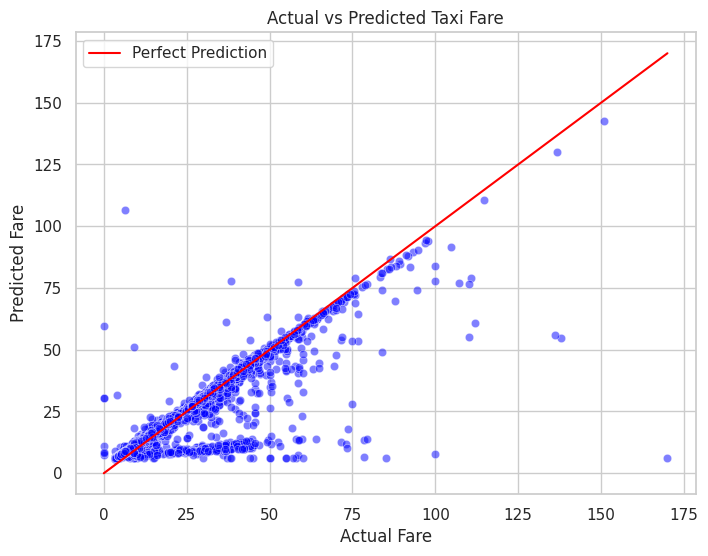

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# style
sns.set(style="whitegrid")

# Plot actual vs predicted fare
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.5)
sns.lineplot(x=y_test, y=y_test, color="red", label="Perfect Prediction")

plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted Taxi Fare")
plt.legend()
plt.show()


In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


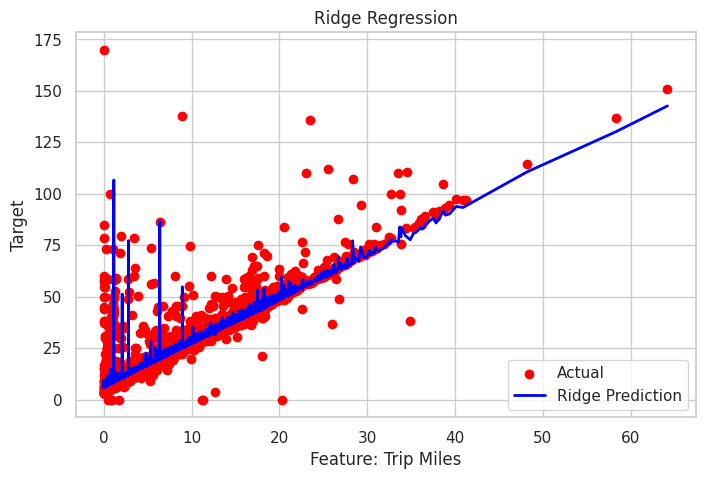

In [ ]:
# Predict
ridge_pred = ridge_model.predict(X_test)

# Use only one feature for plotting (e.g., first column)
X_plot = X_test.iloc[:, 0].values  # shape = (n_samples,)

# Sort for smooth line
sorted_indices = np.argsort(X_plot)
X_sorted = X_plot[sorted_indices]
y_sorted = ridge_pred[sorted_indices]

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X_plot, y_test, color='red', label='Actual')
plt.plot(X_sorted, y_sorted, color='blue', linewidth=2, label='Ridge Prediction')
plt.title("Ridge Regression")
plt.xlabel("Feature: " + X_test.columns[0])
plt.ylabel("Target")
plt.legend()
plt.show()

Lasso Regression
MSE: 45.42024061453533
R² Score: 0.8318192340100048


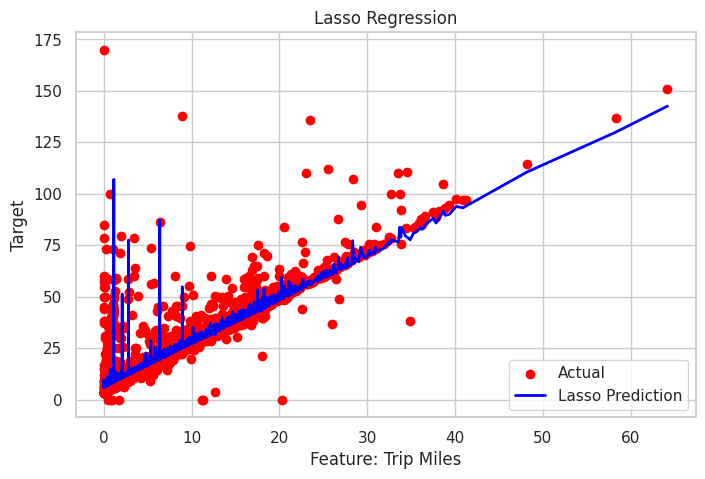

In [ ]:
from sklearn.linear_model import Lasso
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Prediction
lasso_pred = lasso_model.predict(X_test)

# Evaluation
print("Lasso Regression")
print("MSE:", mean_squared_error(y_test, lasso_pred))
print("R² Score:", r2_score(y_test, lasso_pred))

# Use only one feature for plotting (e.g., the first one)
X_plot = X_test.iloc[:, 0].values

# Sort for smooth curve
sorted_indices = np.argsort(X_plot)
X_sorted = X_plot[sorted_indices]
y_sorted = lasso_pred[sorted_indices]

# Visualization
plt.figure(figsize=(8, 5))
plt.scatter(X_plot, y_test, color='red', label='Actual')
plt.plot(X_sorted, y_sorted, color='blue', linewidth=2, label='Lasso Prediction')
plt.title("Lasso Regression")
plt.xlabel("Feature: " + X_test.columns[0])
plt.ylabel("Target")
plt.legend()
plt.show()


In [ ]:
print("\nComparison of Models:")
print(f"Linear Regression R²: {r2_score(y_test, y_pred)}")
print(f"Ridge Regression R²: {r2_score(y_test, ridge_pred)}")
print(f"Lasso Regression R²: {r2_score(y_test, lasso_pred)}")



Comparison of Models:
Linear Regression R²: 0.8318076817431741
Ridge Regression R²: 0.8318076895702071
Lasso Regression R²: 0.8318192340100048
